In [74]:
import pandas as pd
import numpy as np

In [75]:
corona = pd.read_csv('case.csv')
corona.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1,Seoul,Guro-gu,True,Guro-gu Call Center,70,37.508163,126.884387
1,2,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
2,3,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
3,4,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006
4,5,Seoul,Dongdaemun-gu,True,Dongan Church,9,37.592888,127.056766


### 1-1

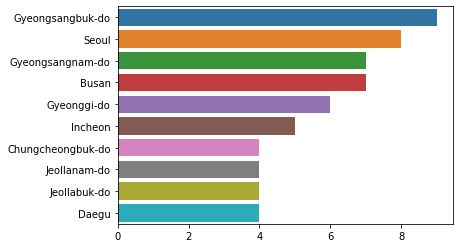

In [76]:
import seaborn as sns
prov = corona.province.value_counts()[:10]
sns.barplot(y = prov.index, x = prov.values)

### 1-2

In [85]:
new_df = corona.dropna(axis=0)
new_df.isnull().sum()

case_id           0
province          0
city              0
group             0
infection_case    0
confirmed         0
latitude          0
longitude         0
dtype: int64

In [86]:
results = pd.Series([x.split()[-1] for x in new_df.infection_case])
results.value_counts()

Church             20
etc                17
patient             8
Hospital            6
inflow              6
Center              5
gym                 2
Home                2
Kindergarten        1
Karaoke             1
Jangyeon-myeon      1
Town                1
Israel              1
Fisheries           1
Academy             1
Shelter             1
APT                 1
Company             1
Woongyang-myeon     1
Laboratory          1
dtype: int64

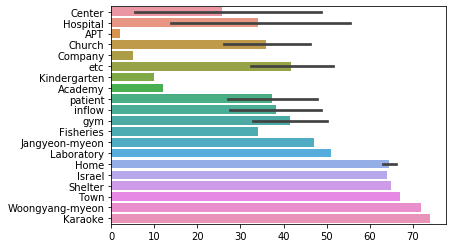

In [89]:
sns.barplot(x = results.index, y = results.values)

### 1-3

In [90]:
corona['is_Gyeongsangbuk-do'] = np.where(corona.province.str.contains('Gyeongsangbuk-do'), 'Yes','No')
corona['is_Gyeongsangbuk-do'][60:]

60     No
61    Yes
62    Yes
63    Yes
64    Yes
65    Yes
66    Yes
67    Yes
68    Yes
69    Yes
70     No
71     No
72     No
73     No
74     No
75     No
76     No
77     No
Name: is_Gyeongsangbuk-do, dtype: object

### 1-4

In [92]:
group_sum = corona.groupby(['infection_case','is_Gyeongsangbuk-do'])
by_ = group_sum.size().unstack().fillna(0)
by_[:10]

is_Gyeongsangbuk-do,No,Yes
infection_case,,
Bonghwa Pureun Nursing Home,0.0,1.0
Bundang Jesaeng Hospital,1.0,0.0
Changnyeong Coin Karaoke,1.0,0.0
Cheongdo Daenam Hospital,2.0,1.0
Dongan Church,1.0,0.0
Eunpyeong St. Mary's Hospital,1.0,0.0
Geochang Church,1.0,0.0
Geochang-gun Woongyang-myeon,1.0,0.0
Goesan-gun Jangyeon-myeon,1.0,0.0


### 1-5

In [93]:
indexer = by_.sum(1).argsort()
indexer[:10]

infection_case
Bonghwa Pureun Nursing Home       0
Bundang Jesaeng Hospital         26
Changnyeong Coin Karaoke         25
Cheongdo Daenam Hospital         23
Dongan Church                    22
Eunpyeong St. Mary's Hospital    21
Geochang Church                  19
Geochang-gun Woongyang-myeon     18
Goesan-gun Jangyeon-myeon        17
Guro-gu Call Center              16
dtype: int64

In [101]:
count_subset = by_.take(indexer[-10:])
count_subset

is_Gyeongsangbuk-do,No,Yes
infection_case,,
Gyeongsan Cham Joeun Community Center,0.0,1.0
Geochang-gun Woongyang-myeon,1.0,0.0
Onchun Church,2.0,0.0
gym,2.0,0.0
Guro-gu Call Center,3.0,0.0
Cheongdo Daenam Hospital,2.0,1.0
overseas inflow,6.0,0.0
contact with patient,8.0,0.0
Shincheonji Church,13.0,1.0


### 1-6

In [102]:
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset[:10]

,infection_case,is_Gyeongsangbuk-do,total
0,Gyeongsan Cham Joeun Community Center,No,0.0
1,Gyeongsan Cham Joeun Community Center,Yes,1.0
2,Geochang-gun Woongyang-myeon,No,1.0
3,Geochang-gun Woongyang-myeon,Yes,0.0
4,Onchun Church,No,2.0
5,Onchun Church,Yes,0.0
6,gym,No,2.0
7,gym,Yes,0.0
8,Guro-gu Call Center,No,3.0
9,Guro-gu Call Center,Yes,0.0


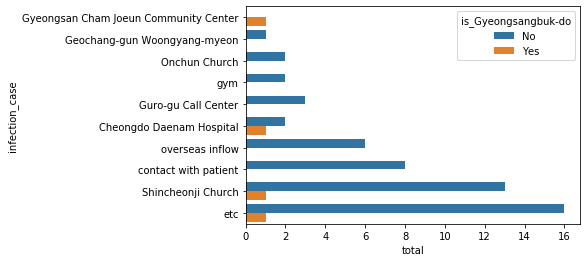

In [104]:
sns.barplot(x='total',y='infection_case',hue='is_Gyeongsangbuk-do',data = count_subset)

### 2-1

In [106]:
usedcar=pd.read_csv('usedcar2.csv')
usedcar.head()

,Price,Odometer,Color
0,14636,37388,white
1,14122,44758,white
2,14470,45854,white
3,15072,40149,white
4,14802,40237,white


In [107]:
mean_cars = usedcar.pivot_table(['Odometer','Price'],
                                columns='Color',
                                aggfunc='mean')
mean_cars

Color,other,silver,white
Odometer,37481.000000,31975.833333,37967.486486
Price,14618.969697,15220.200000,14682.432432


### 2-2

In [110]:
usedcar.groupby('Color').Odometer.sum()

Color
other     1236873
silver     959275
white     1404797
Name: Odometer, dtype: int64

### 2-3

In [133]:
df = pd.concat([usedcar,pd.get_dummies(usedcar['Color'], prefix='Color')], axis=1)
df = df.drop('Color', axis=1)
df.head()

,Price,Odometer,Color_other,Color_silver,Color_white
0,14636,37388,0,0,1
1,14122,44758,0,0,1
2,14470,45854,0,0,1
3,15072,40149,0,0,1
4,14802,40237,0,0,1


In [148]:
from sklearn import linear_model

In [149]:
Y = df['Price']
X = df[['Odometer','Color_other','Color_silver','Color_white']]
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.coef_

array([-5.55395141e-02, -1.28652660e+02,  1.66823362e+02, -3.81707015e+01])